## Array Introduction

Array的数据结构如下所示：

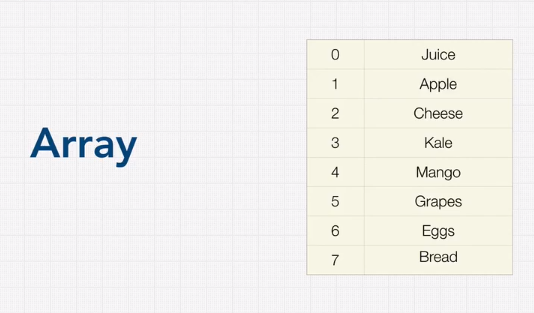

常见的操作有四种：

1. 查找
2. 推入
3. 插入
4. 删除

这四种操作的复杂度如下所示：

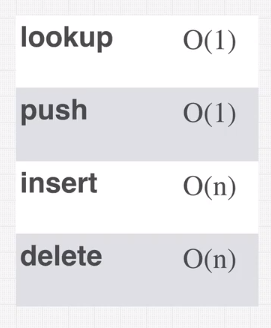

In [1]:
num_list = [1, 2, 3, 4, 5, 6]

我们创建了一个数组。

In [2]:
id(num_list[0])

140719633563888

我们查看数组的第一个元素的内存地址。

In [3]:
id(num_list[1])

140719633563920

我们查看数组的第二个元素的内存地址。

不难发现，这两个元素是相邻在一起的。

这是因为对于计算机而言，在使用数组的时候，会开辟一个连续的内存空间，将元素一个紧挨着另一个元素存储进数组中。

In [5]:
num_list[1]

2

我们只需要使用一个数字来表示元素的位置，就可以访问这个元素，不过需要注意的是，元素的位置是从0开始而不是从1开始。

接着我们来试着添加一个元素：

In [6]:
num_list.append(7)

In [7]:
num_list[-1]

7

可以发现这个元素被添加到了num_list中。

我们也可以使用pop()来弹出列表中的最后一个元素：

In [8]:
num_list.pop()

7

In [9]:
print(num_list)

[1, 2, 3, 4, 5, 6]


接着是在列表的开头添加元素：

In [10]:
num_list.insert(0, 0)

In [11]:
print(num_list)

[0, 1, 2, 3, 4, 5, 6]


Python提供了五种方法来查找列表中是否有某一个元素：

In [12]:
num_list_2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
# in 用来判断列表中是否有某一个元素

3 in num_list_2

True

In [14]:
# not in 用来判断列表中是否不存在着某一个元素

11 not in num_list_2

True

In [15]:
# count 出现的次数

num_list_2.count(2)

1

In [16]:
# 第一个符合需求的元素出现的位置

num_list_2.index(5)

4

## Staric vs Dynamic Array

静态和动态的区别在于是否能够对array的大小进行修改。

Python语言的list无疑是dynamic，但是C++提供的array则是static。

我们先来写一段代码实践一下：

In [21]:
num_list = [0, 1, 2, 3, 4]
id(num_list[0])

140719633563856

In [22]:
num_list.append(5)
id(num_list[0])

140719633563856

In [23]:
num_list.insert(0,-1)
print(num_list[1])
id(num_list[1])

0


140719633563856

可以发现的是，无论是在列表的开头还是结尾添加一个新的元素，都不会对原有的元素的内存地址产生影响。

In [24]:
num_list[1] = 100
id(num_list[1])

140719633567056

我们可以发现，当我们修改某一个元素的值的时候，这个元素的内存地址发生了改变。

我们可以这样去理解：

In [25]:
a = 10
id(a)

140719633564176

In [26]:
a = 20
id(a)

140719633564496

当我们修改a的值的时候，实际上并不是我们修改了a指向的内存地址中存储的值，而是我们开辟了一个新的内存空间，并且将新的值存储到这个内存空间中，然后让a这个符号指向了这个内存空间。

## Implementing An Array

我们来使用Python语言实现一个Array：

In [ ]:
import ctypes


class Array(object):
    """
    array implementation class
    """

    def __init__(self):
        self.item_count = 0
        self.array_capacity = 1
        self.primary_array = self._create_array(self.array_capacity)

    def _create_array(self, array_capacity):
        """
        creates new array with input capacity
        """
        return (array_capacity * ctypes.py_object)()

    def list(self):
        """
        list elements of array
        """
        for items in self.primary_array:
            return " ".join(str(self.primary_array[x]) for x in range(self.item_count))

    def __len__(self):
        """
        Returns number of items in array
        """
        return self.item_count

    def __getitem__(self, item_index):
        """
        Return element at index k
        """
        if not 0 <= item_index < self.item_count:
            return IndexError('index out of range!')
        return self.primary_array[item_index]

    def append(self, item):
        """
        Add new item to array, increase capacity if not available
        """
        if self.item_count == self.array_capacity:
            self._enlarge_array(2 * self.array_capacity)

        self.primary_array[self.item_count] = item
        self.item_count += 1

    def _enlarge_array(self, new_capacity):
        """
        create array with input capacity and copy the contents of old to new array
        """
        secondary_array = self._create_array(new_capacity)
        for i in range(self.item_count):
            secondary_array[i] = self.primary_array[i]

        self.primary_array = secondary_array
        self.array_capacity = new_capacity

    def delete(self, item_index):
        """
        delete element by passing index
        """
        if 0 > item_index or item_index > self.item_count - 1:
            return IndexError('index out of range!')

        while 0 <= item_index < self.item_count - 1:
            self.primary_array[item_index] = self.primary_array[item_index + 1]
            item_index += 1
        self.item_count -= 1

## 创建一个翻转字符串的函数

自己写一个：

In [27]:
def revStr(string_one):
    return string_one[::-1]

In [28]:
revStr("Hello")

'olleH'

## 合并两个Array

In [30]:
def merge(array_1, array_2):
    return sorted(array_1+array_2)

In [31]:
merge([1,3,8], [2,3,4])

[1, 2, 3, 3, 4, 8]

或者可以使用双指针的方法来实现：

In [32]:
""" Python program to merge two
sorted linked lists """


# Linked List Node
class Node:
	def __init__(self, data):
		self.data = data
		self.next = None


# Create & Handle List operations
class LinkedList:
	def __init__(self):
		self.head = None

	# Method to display the list
	def printList(self):
		temp = self.head
		while temp:
			print(temp.data, end=" ")
			temp = temp.next

	# Method to add element to list
	def addToList(self, newData):
		newNode = Node(newData)
		if self.head is None:
			self.head = newNode
			return

		last = self.head
		while last.next:
			last = last.next

		last.next = newNode


# Function to merge the lists
# Takes two lists which are sorted
# joins them to get a single sorted list
def mergeLists(headA, headB):

	# A dummy node to store the result
	dummyNode = Node(0)

	# Tail stores the last node
	tail = dummyNode
	while True:

		# If any of the list gets completely empty
		# directly join all the elements of the other list
		if headA is None:
			tail.next = headB
			break
		if headB is None:
			tail.next = headA
			break

		# Compare the data of the lists and whichever is smaller is
		# appended to the last of the merged list and the head is changed
		if headA.data <= headB.data:
			tail.next = headA
			headA = headA.next
		else:
			tail.next = headB
			headB = headB.next

		# Advance the tail
		tail = tail.next

	# Returns the head of the merged list
	return dummyNode.next


# Create 2 lists
listA = LinkedList()
listB = LinkedList()

# Add elements to the list in sorted order
listA.addToList(5)
listA.addToList(10)
listA.addToList(15)

listB.addToList(2)
listB.addToList(3)
listB.addToList(20)

# Call the merge function
listA.head = mergeLists(listA.head, listB.head)

# Display merged list
print("Merged Linked List is:")
listA.printList()

Merged Linked List is:
2 3 5 10 15 20 